In [6]:
#Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing and Feature Engineering
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [62]:
train_tweets = pd.read_csv("train.csv")
test_tweets = pd.read_csv("test.csv")

In [8]:
#Falls dein Rechner 24 h zum kalkulieren braucht bitte hier unten mal mit weniger Reihen probieren (also mal mit 100 anfangen und hocharbeiten solange bis es nicht mehr in 30 minuten machbar ist)
#train_tweets = train_tweets[0:]


In [9]:
train_tweets.head()


,id,sentiment,tweet
0,515629,1,"@ashleyshakesit oh, you're right. **licks it**..."
1,440059,1,I heart karage curry!
2,291686,0,leaving Nha Trang in a few minutes
3,91198,0,Its Sunday morning! And I'm at work. This has ...
4,205125,1,done with the exams. oh my. such a nerve-wrack...


In [10]:
test_tweets.head()

,id,tweet
0,498471,Cool The LAKERS winS again
1,361243,@Jonasbrothers hi! It's 3:25 a.m. and i can't ...
2,336568,Gutted!! I just got a 2 for 1 off for Boyzone ...
3,267033,@MartinGBEdwards yes that swarm is high - sugg...
4,185069,Now listening to Phantom Of The Opera Original...


In [11]:
train_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448000 entries, 0 to 447999
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         448000 non-null  int64 
 1   sentiment  448000 non-null  int64 
 2   tweet      448000 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.3+ MB


<AxesSubplot:xlabel='sentiment', ylabel='count'>

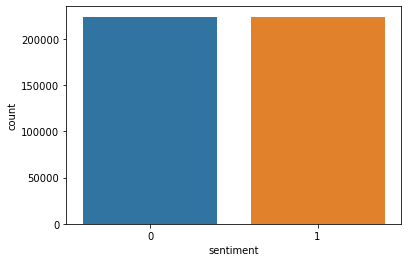

In [12]:
sns.countplot(x= 'sentiment',data = train_tweets)


In [13]:
def form_sentence(tweet):
    tweet_blob = TextBlob(tweet)
    return ' '.join(tweet_blob.words)

print(form_sentence(train_tweets['tweet'].iloc[10]))
print(train_tweets['tweet'].iloc[10])

Today 's 20 min Wii Active exercise is done It was n't half bad And it detected my rest day yesterday and rescheduled Great investment
Today's 20 min Wii Active exercise is done. It wasn't half bad. And it detected my rest day yesterday and rescheduled. Great investment! 


In [14]:
def no_user_alpha(tweet):
    tweet_list = [ele for ele in tweet.split() if ele != 'user']
    clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(clean_tokens)
    clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
    return clean_mess
print(no_user_alpha(form_sentence(train_tweets['tweet'].iloc[10])))
print(train_tweets['tweet'].iloc[10])


['Today', 'min', 'Wii', 'Active', 'exercise', 'done', 'half', 'bad', 'detected', 'rest', 'day', 'yesterday', 'rescheduled', 'Great', 'investment']
Today's 20 min Wii Active exercise is done. It wasn't half bad. And it detected my rest day yesterday and rescheduled. Great investment! 


In [15]:
def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
tweet_list = 'I was playing with my friends with whom I used to play, when you called me yesterday'.split()
print(normalization(tweet_list))


['I', 'be', 'play', 'with', 'my', 'friends', 'with', 'whom', 'I', 'use', 'to', 'play,', 'when', 'you', 'call', 'me', 'yesterday']


In [16]:
def text_preprocessing(tweet):
    tweet = form_sentence(tweet)
    tweet = no_user_alpha(tweet)
    tweet = normalization(tweet) 
    return tweet



In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_preprocessing)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', KNeighborsClassifier(n_neighbors=5)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
msg_train, msg_test, label_train, label_test = train_test_split(train_tweets['tweet'], train_tweets['sentiment'], test_size=0.2)
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))
print(confusion_matrix(predictions,label_test))
print(accuracy_score(predictions,label_test))

In [19]:
train_tweets.describe() 

,id,sentiment
count,448000.000000,448000.000000
mean,319900.067513,0.500000
std,184799.919024,0.500001
min,1.000000,0.000000
25%,159836.750000,0.000000
50%,320155.500000,0.500000
75%,479815.250000,1.000000
max,640000.000000,1.000000


In [20]:
type(msg_test)

pandas.core.series.Series

In [21]:
msg_test

35927                   My camera has a pretty casing now! 
319839    The  brain cells are now functioning again.......
128738    @abbygirl_roxy Ooh, you are a lucky girl. I sl...
280523    uh i ran over a hedgehog!   now thers blood on...
257531             Happy Hump Day- it's downhill from here 
                                ...                        
214043                          @dannynelson don't be mean 
144596                              @isaidicanshout I know 
427524    @jamiejai SMH...ma breathin is gettin there, b...
286083    Im gonna clean ma room!!! Its rather messy/dus...
307735    anyone excited has i am about the mtv movie aw...
Name: tweet, Length: 89600, dtype: object

In [22]:
type(test_tweets)

pandas.core.frame.DataFrame

In [23]:
test_tweets = test_tweets.squeeze()

In [24]:
type(test_tweets)


pandas.core.frame.DataFrame

In [25]:
print(test_tweets)

            id                                              tweet
0       498471                       Cool The LAKERS  winS again 
1       361243  @Jonasbrothers hi! It's 3:25 a.m. and i can't ...
2       336568  Gutted!! I just got a 2 for 1 off for Boyzone ...
3       267033  @MartinGBEdwards yes that swarm is high - sugg...
4       185069  Now listening to Phantom Of The Opera Original...
...        ...                                                ...
191995  191264               time is going realy quick today    x
191996  268342  Totally let down....Chuck lost in first round ...
191997  582539                                        has a cold 
191998  610272  @anniemacdj are you having fun in the sun hone...
191999   44370  Just dragged the drunk birthday girl inside. N...

[192000 rows x 2 columns]


In [26]:
test_tweets = test_tweets["tweet"]

In [27]:
test_tweets

0                              Cool The LAKERS  winS again 
1         @Jonasbrothers hi! It's 3:25 a.m. and i can't ...
2         Gutted!! I just got a 2 for 1 off for Boyzone ...
3         @MartinGBEdwards yes that swarm is high - sugg...
4         Now listening to Phantom Of The Opera Original...
                                ...                        
191995                 time is going realy quick today    x
191996    Totally let down....Chuck lost in first round ...
191997                                          has a cold 
191998    @anniemacdj are you having fun in the sun hone...
191999    Just dragged the drunk birthday girl inside. N...
Name: tweet, Length: 192000, dtype: object

In [54]:
#msg_train, msg_test, label_train, label_test = train_test_split(train_tweets['tweet'], train_tweets['sentiment'], test_size=0.2)
#pipeline.fit(msg_train,label_train)
predictions_test_set = pipeline.predict(test_tweets)
#print(classification_report(predictions,label_test))
#print(confusion_matrix(predictions,label_test))
#print(accuracy_score(predictions,label_test))

In [46]:
10000/1000*2.3

23.0

In [45]:
441/60


7.35

In [83]:
results.to_csv(r'F:/Assignment 4 DAML KNN.csv', index=False)

In [77]:
results = pd.concat([test_tweets['id'], pd.Series(predictions_test_set)], axis=1, ignore_index=True)
results.columns = ['id', 'sentiment']

In [78]:
results.head()

,id,sentiment
0,498471,1
1,361243,0
2,336568,0
3,267033,1
4,185069,1
